<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_4%EC%9E%A5_%EC%95%99%EC%83%81%EB%B8%94%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀앙상블모형(보스턴하우징데이터 + 랜덤포레스트)
* 회귀앙상블은 randomForest패키지에서 가능
* (adabag패키지는 분류앙상블만 제공)

##데이터 읽기 : 보스턴하우징


In [2]:
#데이터 가져오기
library(MASS)
Boston$chas = factor(Boston$chas)
Boston$rad = factor(Boston$rad)
summary(Boston)

      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
                                                                             
       rm             age              dis              rad     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   24     :132  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   5      :115  
 Median :6.208   Median : 77.50   Median : 3.207   4      :110  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   3      : 38  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   

In [5]:
#랜덤포레스트 패키지
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [6]:
#랜덤포레스트 실행
rf.boston = randomForest(medv ~ ., data = Boston, ntree = 100, mtry = 5, importance = T, na.action = na.omit)
summary(rf.boston)

                Length Class  Mode     
call              7    -none- call     
type              1    -none- character
predicted       506    -none- numeric  
mse             100    -none- numeric  
rsq             100    -none- numeric  
oob.times       506    -none- numeric  
importance       26    -none- numeric  
importanceSD     13    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               506    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

In [9]:
#랜덤포레스트에 의한 훈련 데이터의 예측집단
head(rf.boston$predicted, 100)

1        2        3        4        5        6        7        8 
27.05923 22.59806 35.66789 37.23778 34.51167 27.02718 21.03059 17.46940 
       9       10       11       12       13       14       15       16 
19.74120 19.24405 20.69396 22.23618 21.66663 20.34252 19.11605 20.83129 
      17       18       19       20       21       22       23       24 
21.27508 17.72551 18.65325 19.17763 14.35557 17.91752 15.24513 15.18884 
      25       26       27       28       29       30       31       32 
16.78894 15.87556 16.89288 14.94127 19.65383 20.36527 14.72368 19.82097 
      33       34       35       36       37       38       39       40 
15.75757 14.32164 14.50538 21.79162 21.73542 21.49453 20.80495 28.39546 
      41       42       43       44       45       46       47       48 
34.57511 29.69786 25.09122 24.52867 23.41077 20.30518 20.41228 19.33422 
      49       50       51       52       53       54       55       56 
18.15008 19.25185 20.58817 22.05419 25.58990 21.32026 19.85515 35.00833 
      57       58       59       60       61       62       63       64 
24.54526 30.80970 22.86984 20.95500 19.47647 20.07590 23.08721 25.07049 
      65       66       67       68       69       70       71       72 
31.96891 25.20133 20.09864 20.45217 19.74411 20.27944 23.85817 21.70696 
      73       74       75       76       77       78       79       80 
23.60687 23.47878 24.00362 23.27363 21.08258 22.09829 21.07297 22.05170 
      81       82       83       84       85       86       87       88 
26.39872 25.41224 23.53707 23.35218 23.71375 27.16763 20.70022 23.41579 
      89       90       91       92       93       94       95       96 
30.39620 29.54917 23.63576 23.34030 23.52256 24.07154 21.83149 25.55887 
      97       98       99      100 
22.86486 39.98748 40.33741 31.45261

In [10]:
#계산된 입력변수의 중요도 - 각 입력변수들의 목표변수에 대한 설명력
importance(rf.boston, type = 1)

,%IncMSE
crim,7.440522
zn,2.256277
indus,4.796338
chas,1.688645
nox,9.283347
rm,18.194105
age,6.831333
dis,9.562692
rad,6.698528
tax,6.516609


In [14]:
#랜덤포레스트 방법의 적합값 및 평균제곱오차
Boston$medv.hat = predict(rf.boston, newdata =Boston)
cat('MES : ', mean((Boston$medv - Boston$medv.hat)^2))

MES :  1.897951

해석
> 
* 나무모형에서의 MES가 16.099이였던것을 감안하면 랜덤포레스트가 훈련데이터에 대한 설명력을 매우 증가시켰음을 알 수 있음음
* 랜덤포레스트 방법에 의한 표본추출에 의한 분류기생성방식은 부트스트랩을 사용하기 때문에 확률임의 추출에 의한 변동성이 있어 결과값이 달라질 수 있음

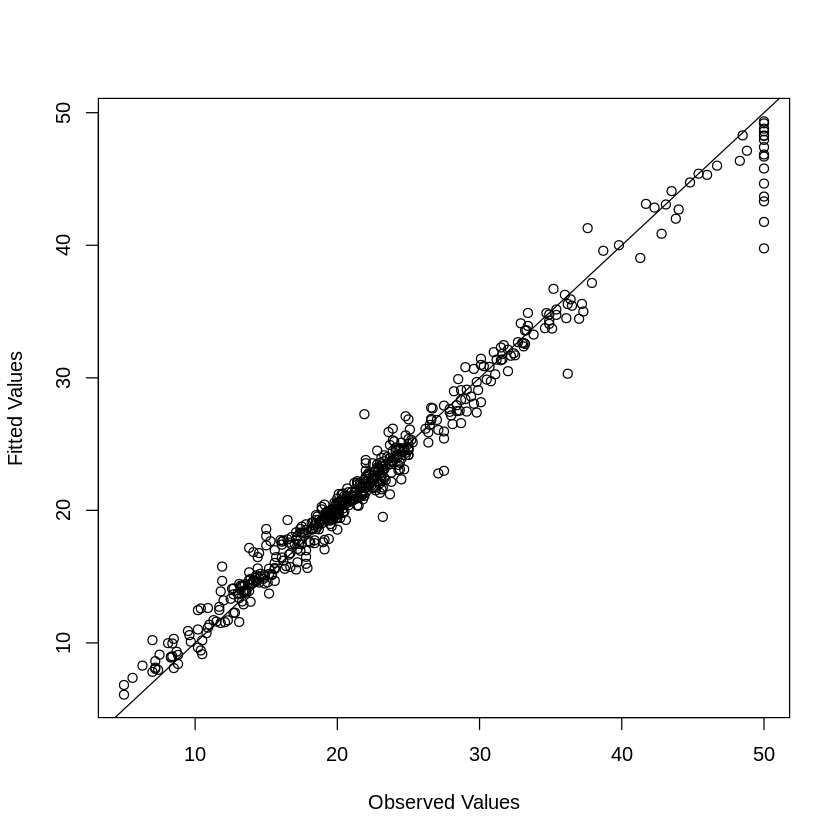

In [17]:
#랜덤포레스트 회귀앙상블의 적합값과 실제값의 일치도
plot(Boston$medv, Boston$medv.hat, xlab = "Observed Values", ylab = "Fitted Values")
abline(0, 1)

In [26]:
#훈련/검증데이터로 분할해 평가
set.seed(1234)
i = sample(1:nrow(Boston), round(nrow(Boston)*0.7))
Boston.train = Boston[i, ]
Boston.test = Boston[-i, ]

rf.train.boston = randomForest(medv ~ ., data = Boston.train, ntree = 100, importance = T, na.action = na.omit)
medv.hat.test <- predict(rf.train.boston, newdata = Boston.test)
cat('PMSE : ', mean((Boston.test$medv - medv.hat.test)^2))

PMSE :  3.495843

설명
>
* 분류나무에서의 검증데이터 오분류율이 19.872것을 봤을 때 상당히 향상된 결과임을 알 수 있음
* 랜덤포레스트는 부트스트랩에의한 임의성으로 결과값이 달라질 수 있음

# 분류앙상블(독일신용평가 + CART방법)

In [ ]:
#데이터 가져오기
url_german = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt'
german = read.table(url_german, header=T)
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)
summary(german)

In [32]:
#배깅 방법- 패키기 가져오기
install.packages('adabag')
install.packages('rpart')
library(rpart)
library(adabag)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
#배깅 실행
control.german.bagging = rpart.control(xval = 0, cp =0, minsplit = 5, maxdepth = 10)
bag.german = bagging(y ~ ., data = german, mfinal = 50, control = control.german.bagging)
summary(bag.german)

ERROR: ignored

In [ ]:
#배깅 방법의 변수 중요도 시각화
print(bag.german$importance)
importanceplot(bag.german)

##분류앙상블 (독일신용평가 + 부스팅)

In [42]:
#부스팅 실행
control.german.boosting <- rpart.control(xval = 10, cp = 0, maxdepth = 1)
boo.german <- boosting(y ~., data = german, boos = T, mfinal = 100, control = control.german.boosting)


ERROR: ignored